# Preparation

Peparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `Cluster S1.csv` (sebuah data yang di-generate secara random) sebelum tahap pemodelan :
1. Import Library
2. Read Dataset
3. Pencarian Model CLuster Terbaik
4. Prosws Clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import silhouette_score


In [ ]:
#Proses pembacaan data dari Sumber
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/cluster_s1.csv')
data.head()

,no,x,y
0,NaN,664159,550946
1,NaN,665845,557965
2,NaN,597173,575538
3,NaN,618600,551446
4,NaN,635690,608046


In [ ]:
#drop data yang tidak diperlukan perlu
data=data.drop('no', axis = 1)
data.head()

,x,y
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


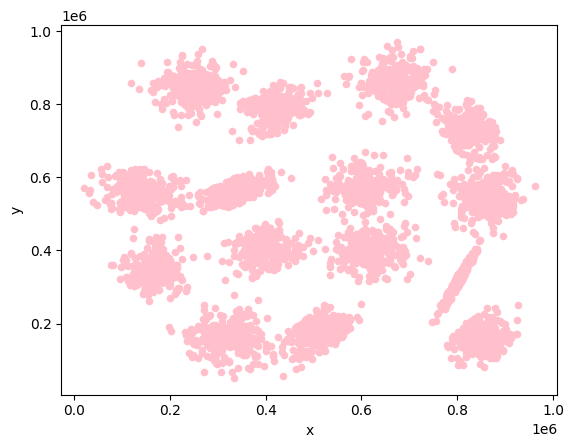

In [ ]:
#Lakukan Visualisasi
#Kita plot biar datanya terlihat

%matplotlib inline
ax1 = data.plot.scatter(x='x',y='y',c='pink')

### Lakukan segmentasi data dengan metode Clustering, metode yang digunakan bebas. Hasil akhir akan dievaluasi menggunakan fungsi silhouette score seperti contoh di bawah ini

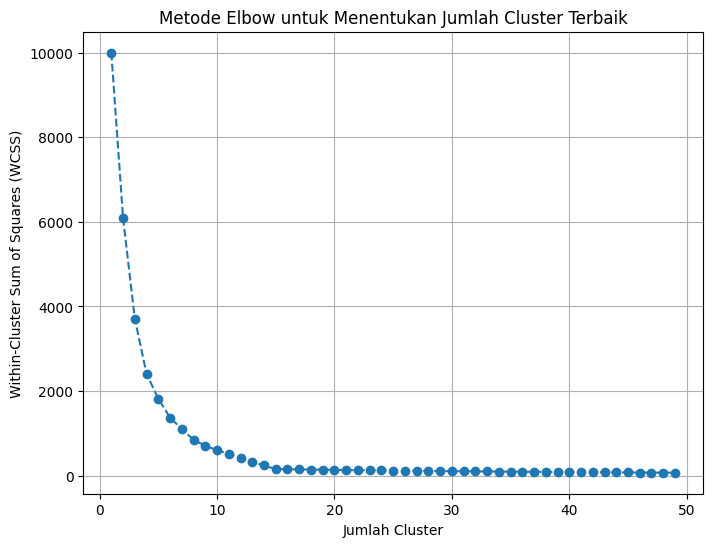

In [ ]:
#Lakukan Proses Pencarian CLuster terbaik untuk data diatas

#START CODE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Mencari jumlah cluster terbaik dengan metode Elbow
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=23)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Menampilkan plot Elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Terbaik')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# Pilih jumlah cluster terbaik berdasarkan elbow plot
# Di sini, Anda harus menentukan jumlah cluster berdasarkan elbow plot
# Misalnya, jika elbow berada di titik 2, maka Anda bisa memilih 2 sebagai jumlah cluster terbaik
#END CODE

In [ ]:
#Lengkapi Code di bawah ini sehingga menghasilkan evaluasi jumlah cluster terbaik
#Contoh pemanggilan Library CLustering
#from sklearn.cluster import KMeans

#START CODE
# Setelah Anda memilih jumlah cluster terbaik, latih K-Means dengan jumlah cluster tersebut
best_n_clusters = 15  # Ganti dengan jumlah cluster terbaik yang Anda pilih
kmeans = KMeans(n_clusters=best_n_clusters, n_init=10, random_state=0)
kmeans.fit(data_scaled)

# Mendapatkan label cluster
labels = kmeans.labels_
#END CODE

score = silhouette_score(data_scaled, labels)
print("silhouette score=",score)

silhouette score= 0.7116413455564674


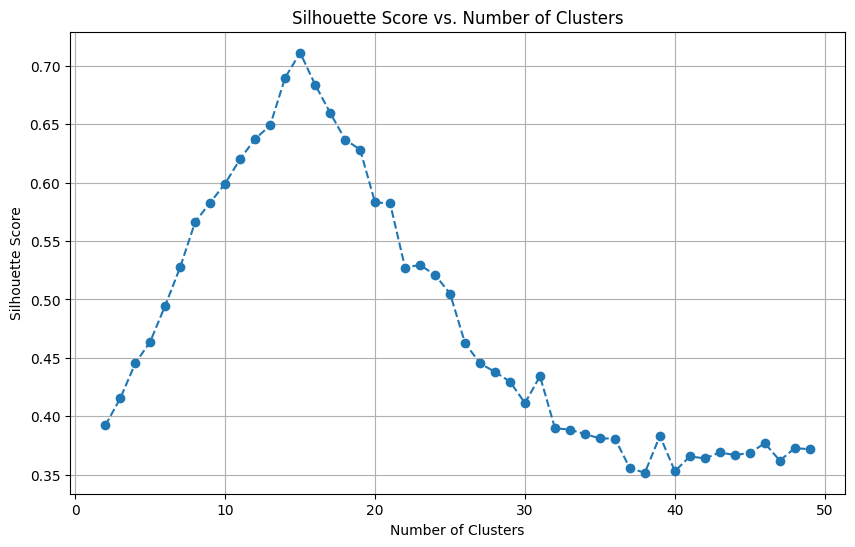

In [ ]:
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define the range of clusters you want to test
num_clusters_range = range(2, 50)

# Iterate through different numbers of clusters
for num_clusters in num_clusters_range:
    # Create a K-Means model
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)

    # Fit the model to the data
    kmeans.fit(data)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Calculate silhouette score for this clustering
    silhouette_avg = silhouette_score(data, cluster_labels)

    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

## Proses Visualisasi hasil CLuster

In [ ]:
#Proses Visualisasi hasil cluster

#Pertama, masukkan dahulu label hasil clustering ke dalam data
# Misalkan Anda sudah memiliki model K-Means yang telah dilatih dan menghasilkan label cluster, misalnya dalam variabel 'labels'
# Anda juga sudah memiliki 'data' sebagai DataFrame yang berisi data awal

# Copy data ke DataFrame 'result'
result = data.copy()

#START CODE
# Masukkan label hasil clustering ke dalam kolom 'cluster'
result['cluster'] = labels  # Gantilah 'labels' dengan nama variabel yang sesuai
result.head()
#END CODE

,x,y,cluster
0,664159,550946,9
1,665845,557965,9
2,597173,575538,9
3,618600,551446,9
4,635690,608046,9


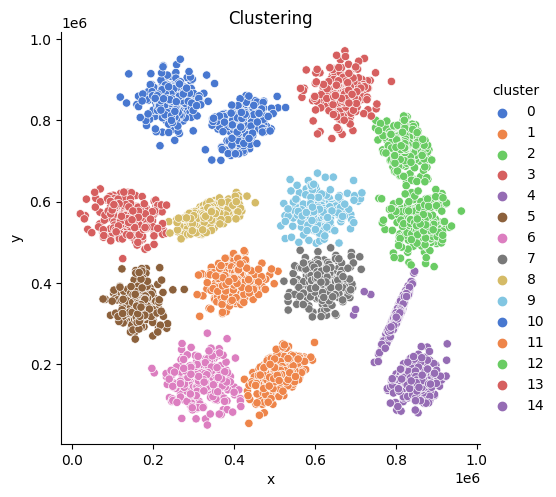

In [ ]:
#Lakukan Plotting terhadap data
import seaborn as sns

#Gunakan library seaborn, lebih mudah.

#START CODE
sns.relplot(x='x', y='y', hue='cluster', data=result, palette='muted')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clustering')
plt.show()
#END CODE

**Kesimpulan**<br>
Dalam proses evaluasi, ditemukan bahwa jumlah cluster terbaik adalah 15, seperti yang diindikasikan oleh nilai silhouette score tertinggi. Dengan demikian, kami memutuskan untuk menggunakan 15 cluster dalam analisis kami. Visualisasi data kami mencerminkan pembagian ini, dengan setiap titik data diplot dengan warna yang mewakili cluster yang sesuai.